In [2]:
import glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from classes import *

data_dir = "/Users/hunterholland/Documents/Research/Laidlaw/Data/Modified"

#### Denoting Sample Files

In [4]:
spitzer_sample = None
chandra_sample = f"{data_dir}/L1517/Chandra/primary/acisf03755N004_evt2.fits"
xmm_sample = f"{data_dir}/L1517/XMM/PPS/P0101440801M1S001MIEVLI0000.FTZ"
rosat_sample = f"{data_dir}/L1517/ROSAT/rp201278a01_bas.fits"
swift_sample = f"{data_dir}/L1517/Swift/xrt/event/sw00034249004xpcw3po_cl.evt.gz"

#### Listing Instrument Event Files

In [5]:
# Spitzer


# Chandra
evt2 = glob.glob(f"{data_dir}/**/Chandra/**/*evt2.fits*", recursive=True)

# XMM
mos_1 = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*M1*MIEVLI*.FTZ", recursive=True)
mos_2 = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*M2*MIEVLI*.FTZ", recursive=True)
pn = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*PN*PIEVLI*.FTZ", recursive=True)

# Rosat
basics = glob.glob(f"{data_dir}/**/ROSAT/*_bas*", recursive=True)

# Swift
cleaned_event = glob.glob(f"{data_dir}/**/Swift/xrt/event/sw*po_cl.evt.gz", recursive=True)

# Spitzer
## Make Energy Histogram

# Chandra
## Make Energy Histogram

B335 XMM data initiated.
Data filtered into file PN_PIEVLI_f3.fits


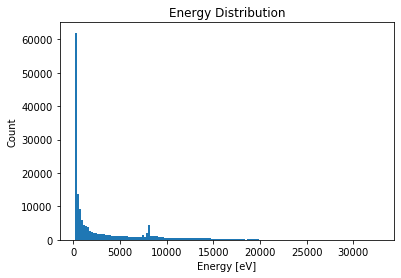

In [14]:
xmm = XMM(pn[0])
energies = xmm.e_mask([300], newfile=True, filename="PN_PIEVLI_f1.fits")
xmm.e_hist(e_list=energies, nbins=150)
# xmm = XMM(mos_2[1])
# energies = xmm.e_mask([0,12000])
# xmm.e_hist(e_list=energies, nbins=150)
# xmm = XMM(mos_2[2])
# energies = xmm.e_mask([0,12000])
# xmm.e_hist(e_list=energies, nbins=150)
# xmm = XMM(mos_2[3])
# energies = xmm.e_mask([0,12000])
# xmm.e_hist(e_list=energies, nbins=150)
# xmm = XMM(mos_2[4])
# energies = xmm.e_mask([0,12000])
# xmm.e_hist(e_list=energies, nbins=150)
# xmm = XMM(mos_2[5])
# energies = xmm.e_mask([0,12000])
# xmm.e_hist(e_list=energies, nbins=150)

# for file in pn:
#     xmm = XMM(file)
#     xmm.e_mask([0,12000], newfile=True, filename="PN_PIEVLI_f1.fits")
# for file in pn:
#     xmm = XMM(file)
#     xmm.e_mask([0,7000], newfile=True, filename="PN_PIEVLI_f2.fits")
# for file in pn:
#     xmm = XMM(file)
#     xmm.e_mask([0,5000], newfile=True, filename="PN_PIEVLI_f3.fits")
# for file in pn:
#     xmm = XMM(file)
#     xmm.e_mask([0,3000], newfile=True, filename="PN_PIEVLI_f4.fits")
# for file in pn:
#     xmm = XMM(file)
#     xmm.e_mask([0,2000], newfile=True, filename="PN_PIEVLI_f5.fits")

# XMM-Newton
#### Notes for Data Filtering
Images may have all sorts of defects: in one example, the edges of all 12 individual detector chips light up and there are all sorts of funny 'streaks' and splotches. All of these are either electronic noise generated signals that masquerade as photons, or cosmic rays (high energy charged particles that pervade all of space, they fly through the detector and create ionization, some fraction of which shows up as fake photons). One (we) can eventually get rid of a lot of that stuff,_if we want to, by a series of 'culls' on the list of photons (we leave out the very lowest photon energies; many electronic noise events show up as very low photon energy fake photons, likewise the highest photon energies (a lot of cosmic rays show up as high energy fake photons);we can look at a time-series of the total count rate in the detectors and eliminate time intervals with increased 'background flaring', etc.)._
## Make Energy Histogram